In [1]:
import wrapper
import tensorflow as tf
from tensorflow.core.example import example_pb2
from cStringIO import StringIO
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
import numpy as np

a = wrapper.Wrapper("discrete_tcnn1", 
            "/home/ubuntu/BDD_Driving_Model/data/discrete_tcnn1/model.ckpt-126001.bestmodel",
            20)

using Yang's load pretrained weights version
('conv1', 'weights', (11, 11, 3, 96))
('weight decay inside network.py = ', 0.0)
('conv1', 'biases', (96,))
(20, 55, 55, 96)
('conv2', 'weights', (5, 5, 48, 256))
('weight decay inside network.py = ', 0.0)
('conv2', 'biases', (256,))
(20, 27, 27, 256)
('conv3', 'weights', (3, 3, 256, 384))
('weight decay inside network.py = ', 0.0)
('conv3', 'biases', (384,))
(20, 13, 13, 384)
('conv4', 'weights', (3, 3, 192, 384))
('weight decay inside network.py = ', 0.0)
('conv4', 'biases', (384,))
(20, 13, 13, 384)
('conv5', 'weights', (3, 3, 192, 256))
('weight decay inside network.py = ', 0.0)
('conv5', 'biases', (256,))
(20, 13, 13, 256)
('fc6', 'weights', (9216, 4096))
('weight decay inside network.py = ', 0.0)
('fc6', 'biases', (4096,))
(20, 1, 1, 4096)
('fc7', 'weights', (4096, 4096))
('weight decay inside network.py = ', 0.0)
('fc7', 'biases', (4096,))
(20, 1, 1, 4096)
('fc8', 'weights', (4096, 1000))
('weight decay inside network.py = ', 0.0)
('f

In [2]:
example = example_pb2.Example()
in_file = "/home/ubuntu/samples-1k/tfrecords/08022699-d03af7f6.tfrecords"

count = 0
for example_serialized in tf.python_io.tf_record_iterator(in_file):
    example.ParseFromString(example_serialized)
    feature_map = example.features.feature
    encoded = feature_map['image/encoded'].bytes_list.value
    print count
    count += 1

0


('only forward pass', 1.4637770652770996)
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]


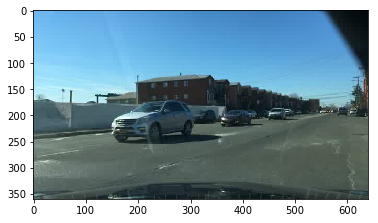

In [3]:
file_jpgdata = StringIO(encoded[0])
dt = Image.open(file_jpgdata)
imshow(np.asarray(dt))
print a.observe_a_frame(np.asarray(dt))

In [ ]:
for i in range(len(encoded)):
    if i % 5 == 0:
        file_jpgdata = StringIO(encoded[0])
        dt = Image.open(file_jpgdata)
        arr = np.asarray(dt)
        out = a.observe_a_frame(arr)
        print out
        print i/5